# Imports and Installations

In [1]:
#First install pyRDDL as following

!pip install -q git+https://github.com/tasbolat1/pyRDDLGym.git --force-reinstall

## Install other packages if needed

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 914.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 114.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import copy
import itertools
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
from collections import deque

from pyRDDLGym.Visualizer.MovieGenerator import MovieGenerator # loads visualizer utilites
from IPython.display import Image, display, clear_output # for displaying gifs in colab
from pyRDDLGym.Elevator import Elevator # imports Discrete Elevator

In [3]:
# Extra imports
import math
import random
from collections import namedtuple
from itertools import count

# Environment Initialization

In [4]:
env = Elevator(instance = 4)
print('Discrete environment actions:')
print(env.disc_actions)
print('Continuous environment actions:')
print(env.base_env.action_space)
print(f"Observation space size for the discrete Elevator Environment: {len(env.disc_states)}")

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples /usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
CartPole_discrete -> A simple continuous state MDP for the classical cart-pole system by Rich Sutton, with discrete actions that apply a constant force on either the left or right side of the cart.
CartPole_continuous -> A simple continuous state-action MDP for the classical cart-pole system by Rich Sutton, with actions that describe the continuous force applied to the cart.
SupplyChain -> A supply chain with factory and multiple warehouses.
NewLanguage -> Example with new language features.
NewtonZero -> Example with Newton root-finding method.
PropDBN -> Simple propositional DBN.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
Traffic -> BLX/QTM traffic model.
Wildfire -> A boolean version of the wildfire fighting domain.
MountainCar -> A simple continuous MDP for the classical mountain car 

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Core/Env/RDDLConstraints.py:85: UserWarning: Constraint does not have a structure of <action or state fluent> <op> <rhs>, where:
<op> is one of {<=, <, >=, >}
<rhs> is a deterministic function of non-fluents or constants only.
>> ( sum_{?f: floor} [ elevator-at-floor(?e, ?f) ] ) == 1
  warnings.warn(


Discrete environment actions:
{0: ('e0_movcurdir_0',), 1: ('e0_movcurdir_1',), 2: ('e0_close_0',), 3: ('e0_close_1',), 4: ('e0_open_0',), 5: ('e0_open_1',)}
Continuous environment actions:
Dict('move-current-dir___e0': Discrete(2), 'open-door___e0': Discrete(2), 'close-door___e0': Discrete(2))
Observation space size for the discrete Elevator Environment: 45056


# Hyperparameters

In [5]:
# Define hyperparameters

## IMPORTANT: <BEGIN> DO NOT CHANGE THIS CODE!
## GENERAL HYPERPARAMS
num_episodes = 3000
## IMPORTANT: <END> DO NOT CHANGE THIS CODE!

learning_rate = 1e-4
BATCH_SIZE = 128
clip_value = 0.2  # Gradient clipping value

## ALGO SPECIFIC HYPERPARAMS
# Update the hyperparams as necessary for your implementation
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005

# Model Definition (COPY THIS OVER TO your AGENT.PY)


In [6]:
# Define the Model here - all component models (in case of actor-critic or others) MUST subclass nn.Module
class YourModel(nn.Module):
    def __init__(self):
        super(YourModel, self).__init__()
        # Your model layers and initializations here
        self.layer1 = nn.Linear(11, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 6)

    def forward(self, x):
        # x will be a tensor with shape [batch_size, 11]
        # Your forward pass logic here
        # Ensure the output has shape [batch_size, 6]
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)


Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Feature Extraction

In [7]:
## IMPORTANT: DO NOT CHANGE THIS CODE!
env_features = list(env.observation_space.keys())

def convert_state_to_list(state, env_features):
    out = []
    for i in env_features:
        out.append(state[i])
    return out

# Neural Net Initialization

In [18]:
# Convert networks to CUDA if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
# Initialize the network and optimizer
input_size = len(env_features)
output_size = 6

# INITIALIZE OTHER NETWORK PARAMS HERE
hidden_size = 128

# INITIALIZE YOUR NETWORK HERE
# your_network = YourModel()

policy_net = YourModel().to(device)
target_net = YourModel().to(device)
target_net.load_state_dict(policy_net.state_dict())

steps_done = 0
episode_durations = []

# INIT OPTIMIZER - Adam is a good start, but you can try changing this as well
# optimizer = optim.Adam(
#     your_network.parameters(), lr=learning_rate
# )
optimizer = optim.AdamW(policy_net.parameters(), lr=learning_rate, amsgrad=True)

In [24]:
memory = ReplayMemory(10000)

## Gradient Clipping (Optional, you can use torch's version as well)

In [20]:
# Define a function for gradient clipping
def clip_grads(model, clip_value):
    for param in model.parameters():
        if param.grad is not None:
            param.grad.data = torch.clamp(param.grad.data, -clip_value, clip_value)

# Live Plotting Setup

In [21]:
# Create a figure for plotting
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
plt.ion()

# Lists to store rewards and episode numbers
rewards_list = []
episodes = []

def exponential_smoothing(data, alpha=0.1):
    """Compute exponential smoothing."""
    smoothed = [data[0]]  # Initialize with the first data point
    for i in range(1, len(data)):
        st = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(st)
    return smoothed

def live_plot(data_dict, figure, ylabel="Total Rewards"):
    """Plot the live graph."""
    clear_output(wait=True)
    ax.clear()
    for label, data in data_dict.items():
        if label == "Total Reward":
            ax.plot(data, label=label, color="yellow", linestyle='--')

            # Compute and plot moving average for total reward
            ma = exponential_smoothing(data)
            ma_idx_start = len(data) - len(ma)
            ax.plot(range(ma_idx_start, len(data)), ma, label="Smoothed Value", linestyle="-", color="purple", linewidth=2)
        else:
            ax.plot(data, label=label)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left')
    display(figure)


# RL Algorithm

In [22]:
def choose_action(state):
    ## TODO - RETURN AN INTEGER FROM 0 - 5 (both inclusive) based on your model training/testing strategy
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1

    if sample > eps_threshold:
        with torch.no_grad():
            action = policy_net(state).argmax().item()
            action = torch.tensor([[action]], device=device, dtype=torch.long)
            return action
    else:
        action = torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)
        return action

In [23]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # This converts batch-array of Transitions to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    # print(batch.action)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

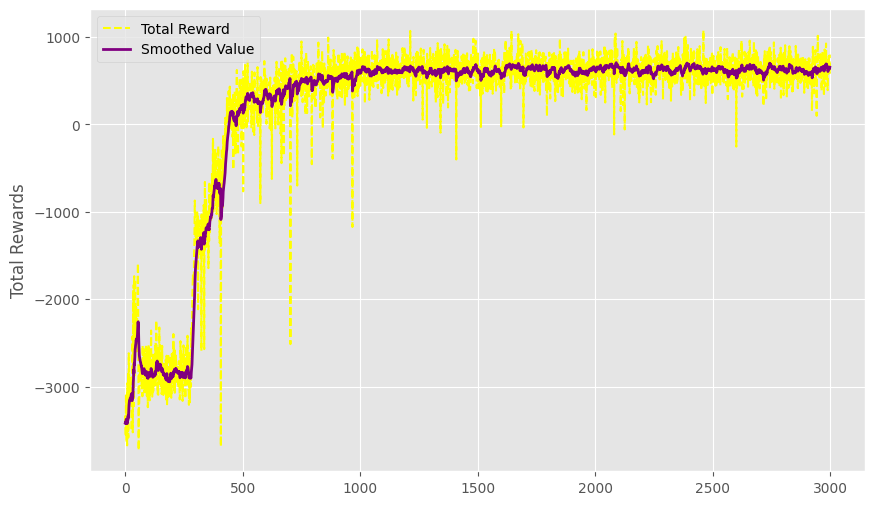

100%|██████████| 3000/3000 [1:36:22<00:00,  1.93s/it, Total Reward=tensor([798.])]


In [25]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
plt.ion()

# Create a tqdm progress bar
progress_bar = tqdm.tqdm(range(num_episodes), postfix={'Total Reward': 0, 'Loss': 0})

# RL algorithm training loop
for episode in progress_bar:
    total_reward = 0
    state = env.reset()
    t = 0

    while True:
        # Convert the original state to the suitable format for the network
        state_desc = env.disc2state(state)
        state_list = convert_state_to_list(state_desc, env_features)
        state_tensor = torch.tensor(state_list, dtype=torch.float32, device=device)

        action = choose_action(state_tensor)

        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Convert the next state to the suitable format for the network
        next_state_desc = env.disc2state(next_state)
        next_state_list = convert_state_to_list(next_state_desc, env_features)
        next_state_tensor = torch.tensor(next_state_list, dtype=torch.float32, device=device)

        # Hint: You may want to collect experiences from the environment to update the agent in batches!
        memory.push(state_tensor.unsqueeze(0), action, next_state_tensor.unsqueeze(0), reward)

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()

        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            break

        state = next_state
        total_reward += reward.cpu()

    rewards_list.append(total_reward)
    episodes.append(episode)

    live_plot({'Total Reward': rewards_list}, fig)

    # Saving the model
    if episode%500 == 0:
      torch.save(policy_net, f'model.pth')

    progress_bar.set_postfix({'Total Reward': total_reward})

In [28]:
torch.save(policy_net, 'model.pt')

# Test Performance

In [30]:
# Initialize the environment
env = Elevator(instance = 4)

# Reset the environment to get the initial state

num_episodes_to_run = 100
rewards = []
# Run episodes using the trained Neural Net
for episode in tqdm.tqdm(range(num_episodes_to_run)):
    state = env.reset()
    total_reward = 0  # Initialize total reward for this episode
    while True:
        # Convert the current state to a dictionary
        state_desc = env.disc2state(state)
        state_list = convert_state_to_list(state_desc, env_features)
        state_tensor = torch.tensor(state_list, dtype=torch.float32, device=device)

        # Use the Neural Net to get the action for the current state

        action = choose_action(state_tensor)

        # Step the environment with the selected action
        next_state, reward, done, _ = env.step(action.item())

        # Update the total reward for this episode
        total_reward += reward

        # Update the current state for the next iteration
        state = next_state

        if done:
            break
    rewards.append(total_reward)

print(f"\nMean Rewards: {np.mean(rewards)}")
# Don't forget to close the environment when you're done
env.close()

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples /usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
CartPole_discrete -> A simple continuous state MDP for the classical cart-pole system by Rich Sutton, with discrete actions that apply a constant force on either the left or right side of the cart.
CartPole_continuous -> A simple continuous state-action MDP for the classical cart-pole system by Rich Sutton, with actions that describe the continuous force applied to the cart.
SupplyChain -> A supply chain with factory and multiple warehouses.
NewLanguage -> Example with new language features.
NewtonZero -> Example with Newton root-finding method.
PropDBN -> Simple propositional DBN.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
Traffic -> BLX/QTM traffic model.
Wildfire -> A boolean version of the wildfire fighting domain.
MountainCar -> A simple continuous MDP for the classical mountain car 

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Core/Env/RDDLConstraints.py:85: UserWarning: Constraint does not have a structure of <action or state fluent> <op> <rhs>, where:
<op> is one of {<=, <, >=, >}
<rhs> is a deterministic function of non-fluents or constants only.
>> ( sum_{?f: floor} [ elevator-at-floor(?e, ?f) ] ) == 1
  warnings.warn(
100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Mean Rewards: 631.3575
